<a href="https://colab.research.google.com/github/Asvataman/FaceDetection-FaceRecognition/blob/main/FaceDetection_FaceRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Biometric Attendance System**

This project is based on Google photos indentifying people faces in a giving image and sorting them. By using this with a single photo of a class taken during a class can be used to find all the people in that image. The document shows how we implemented identifying different people from a given image. 

# Libraries

“Multi-Task Cascaded Convolutional Neural Network” or MTCNN for short, described by Kaipeng Zhang, et al. in the 2016 paper titled “Joint Face Detection and Alignment Using Multitask Cascaded Convolutional Networks.”

The network uses a cascade structure with three networks; first the image is rescaled to a range of different sizes (called an image pyramid), then the first model (Proposal Network or P-Net) proposes candidate facial regions, the second model (Refine Network or R-Net) filters the bounding boxes, and the third model (Output Network or O-Net) proposes facial landmarks



In [ ]:
!pip install mtcnn  

     |████████████████████████████████| 2.3MB 3.4MB/s 


In [ ]:
!pip install -U -q PyDrive

In [ ]:
from matplotlib import pyplot
from mtcnn.mtcnn import MTCNN
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import matplotlib.cm as cm

In [ ]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import warnings

In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
from PIL import Image

# Funtion Definitions

Funtion to draw the outline of faces

In [ ]:
def draw_image_with_boxes(filename, result_list):
	# load the image
	data = pyplot.imread(filename)
	# plot the image
	pyplot.imshow(data)
	# get the context for drawing boxes
	ax = pyplot.gca()
	# plot each box
	for result in result_list:
		# get coordinates
		x, y, width, height = result['box']
		# create the shape
		rect = Rectangle((x, y), width, height, fill=False, color='yellow')
		# draw the box
		ax.add_patch(rect)
        # draw the dots on eyes nose ..
		for key, value in result['keypoints'].items():
			# create and draw dot
			dot = Circle(value, radius=2, color='red')
			ax.add_patch(dot)
	# show the plot
	pyplot.show()

Funtion to show the faces seperately

In [ ]:
def draw_faces(filename, result_list):
	# load the image
	data = pyplot.imread(filename)
	# plot each face as a subplot
	for i in range(len(result_list)):
		# get coordinates
		x1, y1, width, height = result_list[i]['box']
		x2, y2 = x1 + width, y1 + height
		# define subplot
		pyplot.subplot(1, len(result_list), i+1)
		pyplot.axis('off')
		# plot face
		pyplot.imshow(data[y1:y2, x1:x2])
	# show the plot
	pyplot.show()

Funtion to Indentify the Faces and label them

In [ ]:
def separate_face(filename, face_list):
  data = pyplot.imread(filename)
  learn = load_learner('/root/data/Chris')
  for i in range(len(faces)):
    x1, y1, width, height = face_list[i]['box']
    x2 , y2 = x1 + width, y1 + height
    check_face =  data[y1:y2, x1:x2]
    check_face = Image.fromarray(check_face, 'RGB')
    check_face.save('1.png')
    check_face1 = open_image('/content/1.png')
    print(learn.predict(check_face1)[0])
    plt.imshow(check_face)
    plt.show()

# Face Localisation

### Importing Image


In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
local_download_path = os.path.expanduser('~/data')
try:
  os.makedirs(local_download_path)
except: pass

In [ ]:
file_list = drive.ListFile({'q': "'1Wd7L9TD727u4A_YtU031cfTWowZ3z2Me' in parents"}).GetList()

In [ ]:
for f in file_list:
  # 3. Create & download by id.
  print('title: %s, id: %s' % (f['title'], f['id']))
  fname = os.path.join(local_download_path, f['title'])
  print('downloading to {}'.format(fname))
  f_ = drive.CreateFile({'id': f['id']})
  f_.GetContentFile(fname)

title: Group9.JPG, id: 1Wz11nSwHg9PUZTdQFc6YX4zfZPlKpZhi
downloading to /root/data/Group9.JPG
title: Group8.HEIC, id: 1WyY9vlBSN2Pn_Qhz29WJbkMtEr17QjNZ
downloading to /root/data/Group8.HEIC
title: Group7.JPG, id: 1Wv5NeCwZdYC7S-PjjnUaluBeJsWQWB1T
downloading to /root/data/Group7.JPG
title: Group6.jpg, id: 1Ws-Mm_CkJpvIF_HKrXPM-zuR3Ajq83Z2
downloading to /root/data/Group6.jpg
title: Group5.jpg, id: 1WfS2_kML-Lw-yqOaiDx-cuEnCzSn5mWE
downloading to /root/data/Group5.jpg


## Face Detection

In [ ]:
detector = MTCNN()

In [ ]:
filepath = '/root/data/Group9.JPG'

In [ ]:
pixels = pyplot.imread(filepath)

In [ ]:
faces = detector.detect_faces(pixels)
for face in faces:
  print(face) 

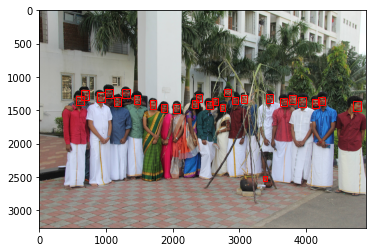

In [ ]:
draw_image_with_boxes(filepath, faces)

In [ ]:
draw_faces(filepath , faces)

# Face Recognition

## Training data

For face recognition we need train our own model. Pretrained models cannot be used. As we do not have enough data (images for our photos i.e. atleat 100) we are using celebrities photos imported from Google Images. 

We use fastAI vision for model creation. fastAI contains pretrained CNN from which we need to calibrate the last to layers to get our personalised model. 

In [ ]:
from fastai.vision import *

###Creating Folders

We took three celebrities( Chris Evans, Chris Hemsworth and Chris Pratt) for training the model. Now we create a folder to save images of the respective people. For future implementation we can collect face data from the students and train the model. 



In [ ]:
folder1 = 'Chris_Evans'
file1 = 'Chris_Evans.csv'
folder2 = 'Chris_Hemsworth'
file2 = 'Chris_Hemsworth.csv'
folder3 = 'Chris_Pratt'
file3 = 'Chris_Pratt.csv'

In [ ]:
path = Path('/root/data/Chris')
dest1 = path/folder1
dest1.mkdir(parents=True, exist_ok=True)

dest2 = path/folder2
dest2.mkdir(parents=True, exist_ok=True)

dest3 = path/folder3
dest3.mkdir(parents=True, exist_ok=True)

###Downloading Imgaes

We stored the URL of images in a CSV file using a java script snippet. Now we use these URL and download the images.

The java script snippet was taken from the site mentioned in referece

In [ ]:
classes = ['Chris_Evans','Chris_Hemsworth','Chris_Pratt']

In [ ]:
download_images(path/file1, dest1, max_pics=200)
download_images(path/file2, dest2, max_pics=200)
download_images(path/file3, dest3, max_pics=200)

###Verifying Images

We need to clear the downloaded images as some of the images may not be downloaded due to copyright issues

In [ ]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

Chris_Evans


cannot identify image file <_io.BufferedReader name='/root/data/Chris/Chris_Evans/00000023.jpg'>


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:987: UserWarning: Couldn't allocate palette entry for transparency
  warnings.warn("Couldn't allocate palette entry for transparency")
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:987: UserWarning: Couldn't allocate palette entry for transparency
  warnings.warn("Couldn't allocate palette entry for transparency")
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:987: UserWarning: Couldn't allocate palette entry for transparency
  warnings.warn("Couldn't allocate palette entry for transparency")
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:987: UserWarning: Couldn't allocate palette entry for transparency
  warnings.warn("Couldn't allocate palette entry for transparency")


cannot identify image file <_io.BufferedReader name='/root/data/Chris/Chris_Evans/00000161.jpg'>


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:987: UserWarning: Couldn't allocate palette entry for transparency
  warnings.warn("Couldn't allocate palette entry for transparency")
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:987: UserWarning: Couldn't allocate palette entry for transparency
  warnings.warn("Couldn't allocate palette entry for transparency")


Chris_Hemsworth


cannot identify image file <_io.BufferedReader name='/root/data/Chris/Chris_Hemsworth/00000114.jpg'>
Chris_Pratt


cannot identify image file <_io.BufferedReader name='/root/data/Chris/Chris_Pratt/00000132.jpg'>
cannot identify image file <_io.BufferedReader name='/root/data/Chris/Chris_Pratt/00000003.jpg'>


In [ ]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [ ]:
data.classes

['Chris_Evans', 'Chris_Hemsworth', 'Chris_Pratt']

## Training the Model

#### End Neurons Calibration

In [ ]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Chris_Evans', 'Chris_Hemsworth', 'Chris_Pratt'], 3, 471, 117)

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

learn.fit_one_cycle(4)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.700499,1.066792,0.461538,02:41
1,1.334316,0.890453,0.316239,02:39
2,1.118955,0.872380,0.273504,02:37
3,0.988772,0.881460,0.316239,02:38


After completion of end layer we save that stage for future usage

In [ ]:
learn.save('stage-1')

#### Calibration of Penultimate Layer

The penultimate layer of fastAI's pretrained model is closed or freezed. So we first unfreeze it and find the optimum learning rate.

 We do this because the number of neurons in the penultimate layer is high, training the model will take longer. Slicing it at the optimum rate gives better results in less time

In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


We plot the Learning rate Vs Loss

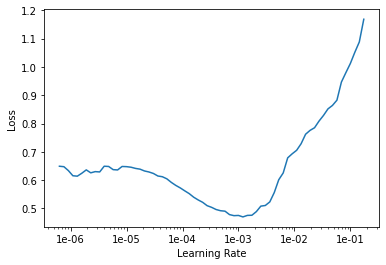

In [ ]:
learn.recorder.plot()

From the graph we can see that learning rate is maximum at 1e-3. Slicing at that point gives results faster

In [ ]:
learn.fit_one_cycle(2, max_lr=slice(1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.711698,0.890209,0.290598,03:40
1,0.598558,0.774534,0.247863,03:32


As slicing at optimum point arrives at result very fast even in 2 epochs.

We save the model after Training

In [ ]:
learn.save('stage-2')

In [ ]:
learn.load('stage-2');

#### Interpretation of the Trained model

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

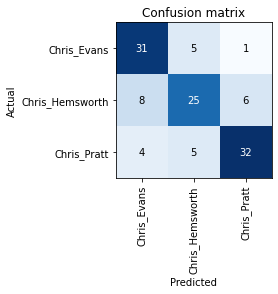

In [ ]:
interp.plot_confusion_matrix()

In [ ]:
learn.export()

The model's efficiency is shown using confusion matrix 

## Implementing the model

In [ ]:
img = plt.imread('/root/data/Chris-Evans-and-Chris-Hemsworth-and-Chris-Pratt.jpg')
plt.imshow(img)

In [ ]:
faces = detector.detect_faces(img)

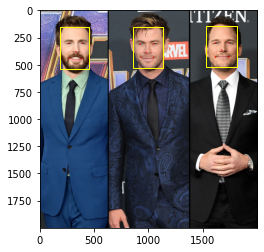

In [ ]:
draw_image_with_boxes('/root/data/Chris-Evans-and-Chris-Hemsworth-and-Chris-Pratt.jpg', faces)

Chris_Evans


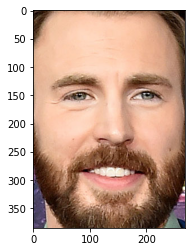

Chris_Pratt


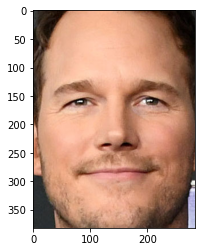

Chris_Hemsworth


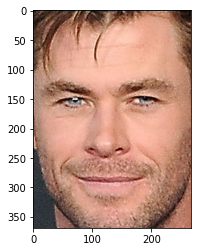

In [ ]:
separate_face('/root/data/Chris-Evans-and-Chris-Hemsworth-and-Chris-Pratt.jpg', faces)

# References

Face Detection:
 https://ieeexplore.ieee.org/document/8623535
 
Face Recognition:
    https://github.com/War-Eagl/course-v3/blob/master/nbs/dl1/lesson2-download.ipynb 

Creatiing dataset from Google Imgaes:
    https://www.pyimagesearch.com/2017/12/04/how-to-create-a-deep-learning-dataset-using-google-images/